In [2]:
# This cell imports libraries that will be used later
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Simulation
## 1.1 Simulation of Random Variables
*Equation 10-1. Simulating future index level in Black-Scholes-Merton setup*

$$S_{T}=S_{0}\exp((r-\frac{1}{2}\sigma^{2})T+\sigma\sqrt{T}z$$

The	variables and parameters have the following	meaning:

$S_{T}$: Index levelat date	T

$r$: Constant riskless short rate

$σ$: Constant volatility (= standard deviation of returns) of S

$z$: Standard normally distributed random variable


In [3]:
S0 = 100  # initial value
r = 0.05  # constant short rate
sigma = 0.25  # constant volatility
T = 2.0  # in years
I = 10000  # number of random draws
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

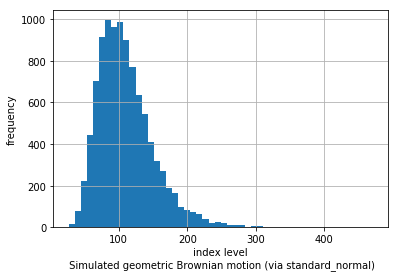

In [4]:
plt.hist(ST1, bins=50)
plt.xlabel('index level\n Simulated geometric Brownian motion (via standard_normal)')
plt.ylabel('frequency')
plt.grid(True);

In [5]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                        sigma * np.sqrt(T), size=I)

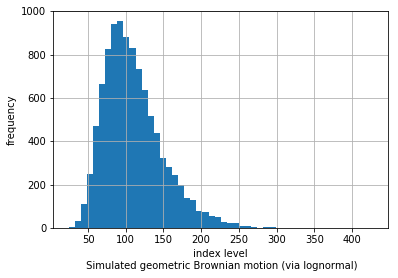

In [6]:
plt.hist(ST2, bins=50)
plt.xlabel('index level\n Simulated geometric Brownian motion (via lognormal)')
plt.ylabel('frequency')
plt.grid(True);

In [7]:
import scipy.stats as scs

In [8]:
#The function in this cell is intended to compare the distributional characteristics of simulation results
def print_statistics(a1, a2):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    a1, a2 : ndarray objects
        results object from simulation
    '''
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print ("%14s %14s %14s" % ('statistic', 'data set 1', 'data set 2'))
    print (45 * "-")
    print ("%14s %14.3f %14.3f" % ('size', sta1[0], sta2[0]))
    print ("%14s %14.3f %14.3f" % ('min', sta1[1][0], sta2[1][0]))
    print ("%14s %14.3f %14.3f" % ('max', sta1[1][1], sta2[1][1]))
    print ("%14s %14.3f %14.3f" % ('mean', sta1[2], sta2[2]))
    print ("%14s %14.3f %14.3f" % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print ("%14s %14.3f %14.3f" % ('skew', sta1[4], sta2[4]))
    print ("%14s %14.3f %14.3f" % ('kurtosis', sta1[5], sta2[5]))

In [9]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         26.921         24.195
           max        470.870        427.676
          mean        110.250        110.482
           std         40.448         40.213
          skew          1.188          1.126
      kurtosis          2.797          2.323


## 1.2 Stochastic Processes

A stochastic process is a sequence of repeated simulations of a random variable.
### 1.2.1 Geometric Brownian motion

Consider the Black-Scholes-Merton model in its dynamic form, as described by the stochastic differential equation (SDE) in Equation 10-2. $Z_{t}$ is a standard Brownian motion. The SDE is called a geometric Brownian motion.

*Equation 10-2. Stochastic differential equation in Black-Scholes-Merton setup*

$$dS_{t}=rS_{t}dt+S_{t}dZ_{t}$$

*Equation 10-3. Simulating index levels dynamically in Black-Scholes-Merton setup*

$$S_{t}=S_{t-\Delta t}\exp((r-\frac{1}{2}\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}z$$

In [10]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * npr.standard_normal(I))

Text(0.5,1,'Simulated geometric Brownian motion at maturity')

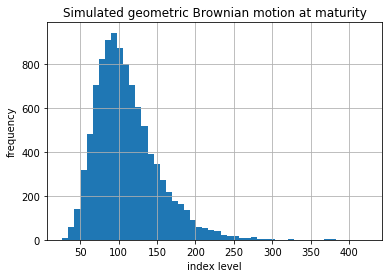

In [11]:
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)
plt.title('Simulated geometric Brownian motion at maturity')

In [12]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         26.818         24.195
           max        422.749        427.676
          mean        110.505        110.482
           std         40.511         40.213
          skew          1.174          1.126
      kurtosis          2.555          2.323


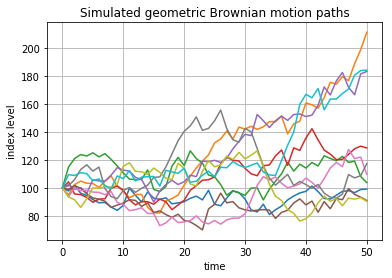

In [13]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
plt.title('Simulated geometric Brownian motion paths');

### 1.2.2 Square-root diffusion
Another important class of financial processes is mean-reverting processes, which are used to model short rates or volatility processes, for example. A popular and widely used model is the square-root diffusion, as proposed by Cox, Ingersoll, and Ross (1985). Equation 10-4 provides the respective SDE.

*Equation 10-4. Stochastic differential equation for square-root diffusion*

$$dx_{t}=\kappa(\theta-x_{t})dt+\sigma\sqrt{x_{t}}dZ_{t}$$

The variables and parameters have the following meaning:

$x_{t}$: Process level at date t

$\kappa$: Mean-reversion factor

$\theta$: Long-term mean of the process

$\sigma$: Constant volatility parameter

$Z$: Standard Brownian motion

It	is	well	known	that	the	values	of	xt	are	chi-squared	distributed.	However,	as	stated
before,	many	financial	models	can	be	discretized	and	approximated	by	using	the	normal
distribution	(i.e.,	a	so-called	Euler	discretization	scheme).	While	the	Euler	scheme	is	exactfor	the	geometric	Brownian	motion,	it	is	biased	for	the	majority	of	other	stochastic
processes.	Even	if	there	is	an	exact	scheme	available	—	one	for	the	square-root	diffusion
will	be	presented	shortly	—	the	use	of	an	Euler	scheme	might	be	desirable	due	to
numerical	and/or	computational	reasons.	Defining	s	≡	t	–	Δt	and	x+	≡	max(x,0),
Equation	10-5	presents	such	an	Euler	scheme.	This	particular	one	is	generally	called	full
truncation	in	the	literature	(cf.	Hilpisch	(2015)).

*Equation 10-5. Euler discretization for square-root diffusion*

$$\tilde{x_{t}}=\tilde{x_{s}}+\kappa(\theta-\tilde{x_{s}}^+)\Delta t+\sigma\sqrt{\tilde{x_{s}}^+}\sqrt{\Delta t}z_{t}$$

$$x_{t}=\tilde{x_{s}}^+$$

In [14]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

In [15]:
I = 10000
M = 50
dt = T / M
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
              + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
              + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt)  
              * npr.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1
x1 = srd_euler()

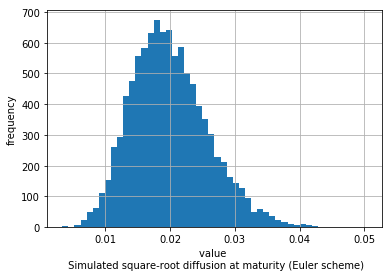

In [16]:
plt.hist(x1[-1], bins=50)
plt.xlabel('value \n Simulated square-root diffusion at maturity (Euler scheme)')
plt.ylabel('frequency')
plt.grid(True)

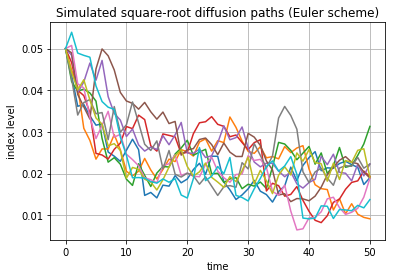

In [17]:
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.title('Simulated square-root diffusion paths (Euler scheme)')
plt.grid(True)

Equation 10-6 presents the exact discretization scheme for the square-root diffusion based on the noncentral chi-square distribution $\chi_{d}^{'2}$ with $df=\frac{4\theta\kappa}{\sigma^{2}}$degrees of freedom and noncentrality parameter $nc=\frac{4\kappa e^{-\kappa \Delta t}}{\sigma^{2}(1-e^{-\kappa \Delta t})}x_{s}$

*Equation 10-6. Exact discretization for square-root diffusion*

$$x_{t}=\frac{\sigma^{2}(1-e^{-\kappa \Delta t})}{4\kappa}\chi_{d}^{'2}(\frac{4\kappa e^{-\kappa \Delta t}}{\sigma^{2}(1-e^{-\kappa \Delta t})}x_{s})$$

In [18]:
def srd_exact():
    x2 = np.zeros((M + 1, I))
    x2[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x2[t - 1] 
        x2[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    return x2
x2 = srd_exact()

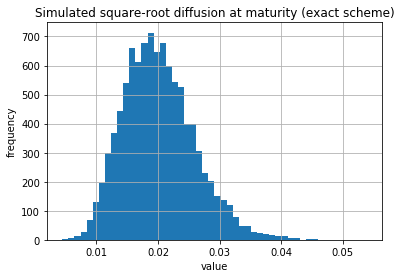

In [19]:
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Simulated square-root diffusion at maturity (exact scheme)')
plt.grid(True)

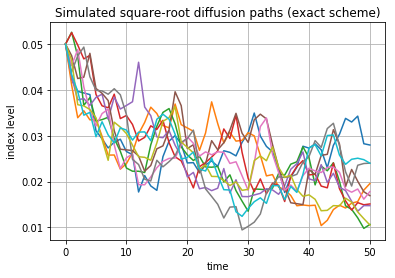

In [20]:
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.title('Simulated square-root diffusion paths (exact scheme)')
plt.grid(True)

In [21]:
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.003          0.004
           max          0.050          0.054
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.537          0.573
      kurtosis          0.400          0.552


In [22]:
I = 250000
%time x1 = srd_euler()

Wall time: 1.68 s


In [23]:
%time x2 = srd_exact()

Wall time: 2.36 s


In [24]:
print_statistics(x1[-1], x2[-1])
x1 = 0.0; x2 = 0.0

     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.002          0.003
           max          0.056          0.056
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.549          0.571
      kurtosis          0.425          0.490


### 1.2.3 Stochastic volatility
One	of	the	major	simplifying	assumptions	of	the	Black-Scholes-Merton	model	is	the
constant	volatility.	However,	volatility	in	general	is	neither	constant	nor	deterministic;	it	is
stochastic.	Therefore,	a	major	advancement	with	regard	to	financial	modeling	was
achieved	in	the	early	1990s	with	the	introduction	of	so-called	stochastic	volatility	models.
One	of	the	most	popular	models	that	fall	into	that	category	is	that	of	Heston	(1993),	which
is	presented	in	Equation	10-7.

*Equation 10-7. Stochastic differential equations for Heston stochastic volatility model*

$$dS_{t}=rS_{t}dt+\sqrt{v_{t}}S_{t}dZ_{t}^{1}$$

$$dv_{t}=\kappa_{v}(\theta_{v}-v_{t})dt+\sigma_{v}\sqrt{v_{t}}dZ_{t}^{2}$$

$$dZ_{t}^{1}dZ_{t}^{2}=\rho$$

In [25]:
S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

In [26]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)

In [27]:
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [28]:
M = 50
I = 10000
ran_num = npr.standard_normal((2, M + 1, I))

In [29]:
dt = T / M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt
          + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt)  
          * ran[1])
v = np.maximum(vh, 0)

In [30]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                    np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

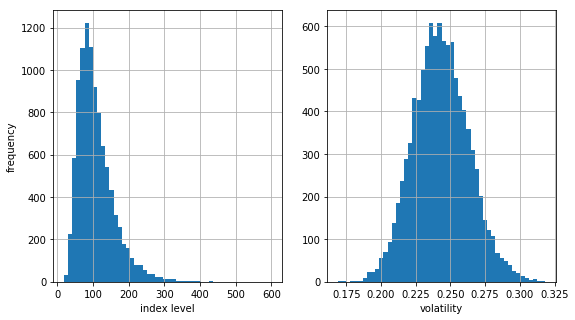

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')
ax2.grid(True)

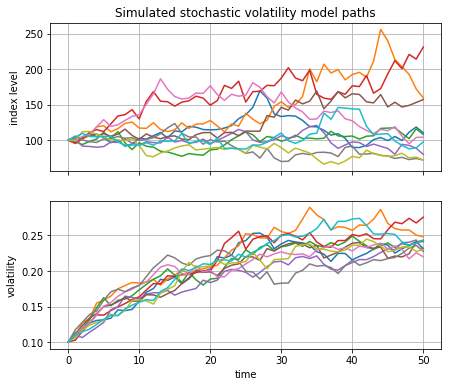

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax1.set_title('Simulated stochastic volatility model paths')
ax1.grid(True)
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid(True)

In [33]:
print_statistics(S[-1], v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         18.698          0.169
           max        599.838          0.318
          mean        108.792          0.243
           std         51.910          0.020
          skew          1.628          0.160
      kurtosis          5.137          0.040


### 1.2.4 Jump-Diffusion
Stochastic	volatility	and	the	leverage	effect	are	stylized	(empirical)	facts	found	in	a
number	of	markets.	Another	important	stylized	empirical	fact	is	the	existence	of	jumps	in
asset	prices	and,	for	example,	volatility.	In	1976,	Merton	published	his	jump	diffusion
model,	enhancing	the	Black-Scholes-Merton	setup	by	a	model	component	generating
jumps	with	log-normal	distribution.	The	risk-neutral	SDE	is	presented	in	Equation	10-8.

*Equation 10-8. Stochastic differential equation for Merton jump diffusion model*

$$dS_{t}=(r-r_{J})S_{t}dt+S_{t}dZ_{t}+J_{t}S_{t}dN_{t}$$

For completeness, here is an overview of the variables’ and parameters’ meaning:

$S_{t}$: Index level at date t

$r$: Constant riskless short rate

$r_{J}\equiv\lambda\cdot(e^{\mu_{J}+\delta^{2}/2}-1)$: Drift correction for jump to maintain risk neutrality

$\sigma$: Constant volatility of S

$dZ_{t}$: Standard Brownian motion

$J_{t}$: Jump at date t with distribution …

$\bullet …log(1+J_{t})\approx N(log(1+\mu_{J}-\frac{\delta^{2}}{2},\delta^{2})$ with

$\bullet …$N as the cumulative distribution function of a standard normal random variable

$N_{t}$: Poisson process with intensity

Equation 10-9 presents an Euler discretization for the jump diffusion where the $z_{t}^{n}$ are standard normally distributed and the $y_{t}$  are Poisson distributed with intensity.

*Equation 10-9. Euler discretization for Merton jump diffusion model*

$$S_{t}=S_{t-\Delta t}(e^{(r-r_{J}-\sigma^{2}/2)\Delta t+\sigma\sqrt{\Delta t}z_{t}^{1}}+(e^{\mu_{J}+\delta z_{t}^{2}}-1)y_{t})$$

In [34]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0

In [35]:
M = 50
I = 10000
dt = T / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

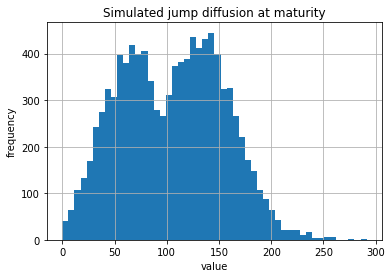

In [36]:
plt.hist(S[-1], bins=50)
plt.title('Simulated jump diffusion at maturity')
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

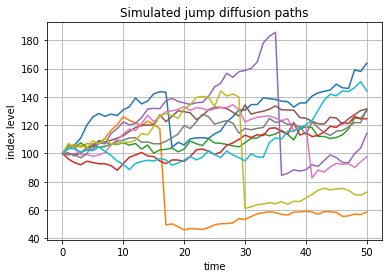

In [37]:
plt.plot(S[:, :10], lw=1.5)
plt.title('Simulated jump diffusion paths')
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

## 1.3 Variance Reduction

In [38]:
print ("%15s %15s" % ('Mean', 'Std. Deviation'))
print (31 * "-")
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * 10000)
    print ("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
-0.011870394558  1.008752430725
-0.002815667298  1.002729536352
-0.003847776704  1.000594044165
-0.003058113374  1.001086345326
-0.001685126538  1.001630849589
-0.001175212007  1.001347684642
-0.000803969036  1.000159081432
-0.000601970954  0.999506522127
-0.000147787693  0.999571756099
-0.000313035581  0.999646153704
-0.000178447061  0.999677277878
 0.000096501709  0.999684346792
-0.000135677013  0.999823841902
-0.000015726986  0.999906493379
-0.000039368519  1.000063091949


In [39]:
i ** 2 * 10000

8410000

In [40]:
sn = npr.standard_normal(int(10000 / 2))
sn = np.concatenate((sn, -sn))
np.shape(sn)

(10000,)

In [41]:
print ("%15s %15s" % ('Mean', 'Std. Deviation'))
print (31 * "-")
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * int(10000 / 2))
    sn = np.concatenate((sn, -sn))
    print ("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
 0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


In [42]:
sn = npr.standard_normal(10000)

In [43]:
sn.mean()

-0.001165998295162494

In [44]:
sn.std()

0.991255920204605

In [45]:
sn_new = (sn - sn.mean()) / sn.std()

In [46]:
sn_new.std()

0.9999999999999999

In [47]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simulation.
    
    Parameters
    ==========
    M : int
        number of time intervals for discretization
    I : int
        number of paths to be simulated
    anti_paths: boolean
        use of antithetic variates
    mo_math : boolean
        use of moment matching
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

In [48]:
sn_new.mean()

-2.3803181647963357e-17

# 2. Valuation
## 2.1 European	Options

The	payoff	of	a	European	call	option	on	an	index	at	maturity	is	given	by	h(ST)	≡	max(ST	–
K,0),	where	ST	is	the	index	level	at	maturity	date	T	and	K	is	the	strike	price.	Given	a,	or	in
complete	markets	the,	risk-neutral	measure	for	the	relevant	stochastic	process	(e.g.,
geometric	Brownian	motion),	the	price	of	such	an	option	is	given	by	the	formula	in
Equation	10-10.

*Equation 10-10. Pricing by risk-neutral expectation*

$$C_{0}=e^{rT}E_{0}^Q(h(S_{T}))e^{rT}\int_{0}^{\infty}h(s)q(s)ds$$

Equation	10-11	provides	the	respective	Monte	Carlo	estimator	for	the	European	option, where	 	is	the	ith	simulated	index	level	at	maturity.

*Equation 10-11. Risk-neutral Monte Carlo estimator*

$$\widetilde{C_{0}}=e^{rT}\frac{1}{I}\sum_{i=1}^{I} h(\tilde{S}^{i}_{T})$$

In [49]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000
def gbm_mcs_stat(K):
    ''' Valuation of European call option in Black-Scholes-Merton
    by Monte Carlo simulation (of index level at maturity)
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    sn = gen_sn(1, I)
    # simulate index level at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
                 + sigma * np.sqrt(T) * sn[1])
    # calculate payoff at maturity
    hT = np.maximum(ST - K, 0)
    # calculate MCS estimator
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
    return C0

In [50]:
gbm_mcs_stat(K=105.)

10.044221852841922

In [51]:
#The following function considers the dynamic simulation approach and 
#allow for European put options in addition to the call option.
M = 50
def gbm_mcs_dyna(K, option='call'):
    ''' Valuation of European options in Black-Scholes-Merton
    by Monte Carlo simulation (of index level paths)
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    dt = T / M
    # simulation of index level paths
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])
    # case-based calculation of payoff
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
    # calculation of MCS estimator
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
    return C0

In [52]:
gbm_mcs_dyna(K=110., option='call')

7.950008525028434

In [53]:
gbm_mcs_dyna(K=110., option='put')

12.629934942682004

In [54]:
# We want to find out how well the functions above estimated the option values. So we compare the 
# results from bsm_functions with the results above respectively.
from bsm_functions import bsm_call_value
stat_res = []
dyna_res = []
anal_res = []
k_list = np.arange(80.0, 120.1, 5.0)
np.random.seed(200000)
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))
    dyna_res.append(gbm_mcs_dyna(K))
    anal_res.append(bsm_call_value(S0, K, T, r, sigma))
stat_res = np.array(stat_res)
dyna_res = np.array(dyna_res)
anal_res = np.array(anal_res)

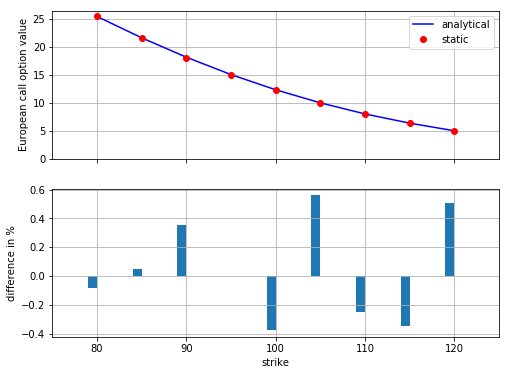

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, stat_res, 'ro', label='static')
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylim(ymin=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)

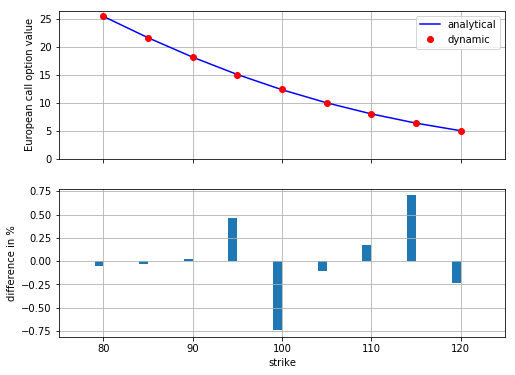

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylim(ymin=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)

## 2.2 American Options
The	valuation	of	American	options	is	more	involved	compared	to	European	options.	In
this	case,	an	optimal	stopping	problem	has	to	be	solved	to	come	up	with	a	fair	value	of	the
option.	Equation	10-12	formulates	the	valuation	of	an	American	option	as	such	a	problem.
The	problem	formulation	is	already	based	on	a	discrete	time	grid	for	use	with	numerical
simulation.	In	a	sense,	it	is	therefore	more	correct	to	speak	of	an	option	value	given
Bermudan	exercise.	For	the	time	interval	converging	to	zero	length,	the	value	of	the
Bermudan	option	converges	to	the	one	of	the	American	option.

*Equation 10-12. American option prices as optimal stopping problem*

$$V_{0}= \sup_{\tau \in \{0,\Delta t,2\Delta t,...,T\}}e^{rT}E_{0}^Q(h(S_{T}))$$

*Equation 10-13. Least-squares regression for American option valuation*

$$\min_{\alpha_{1,t},...,\alpha_{D,t}}\frac{1}{I}\sum_{i=1}^I (Y_{t,i}-\sum_{d=1}^D \alpha_{d,t}\cdot b_d (S_{t,i}))$$

In [57]:
#The following function implements the LSM algorithm for 
#both American call and put options
def gbm_mcs_amer(K, option='call'):
    ''' Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simulation by LSM algorithm
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    dt = T / M
    df = np.exp(-r * dt)
    # simulation of index levels
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])
    # case based calculation of payoff
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)
    # LSM algorithm
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    # MCS estimator
    C0 = df * 1 / I * np.sum(V[1])
    return C0

In [58]:
gbm_mcs_amer(110., option='call')

7.778933279449315

In [59]:
gbm_mcs_amer(110., option='put')

13.614023206242445

In [60]:
euro_res = []
amer_res = []
k_list = np.arange(80., 120.1, 5.)
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put'))
    amer_res.append(gbm_mcs_amer(K, 'put'))
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

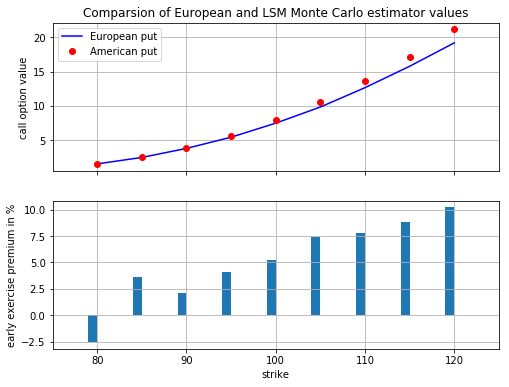

In [61]:
# The following chart shows the price difference between American and European options, 
#which is mainly caused by early exercise premium.
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('call option value')
ax1.set_title('Comparsion of European and LSM Monte Carlo estimator values')
ax1.grid(True)
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)

# 3. Risk Measures
## 3.1 Value at risk
VaR	is	a	number	denoted	in	currency	units (e.g.,	USD,	EUR,	JPY)	indicating	a	loss	(of	a	portfolio,	a	single	position,	etc.)	that	is	not exceeded	with	some	confidence	level	(probability)	over	a	given	period	of	time.


In [62]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10000
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

In [63]:
# Generate the absolute return and sort them.
R_gbm = np.sort(ST - S0)

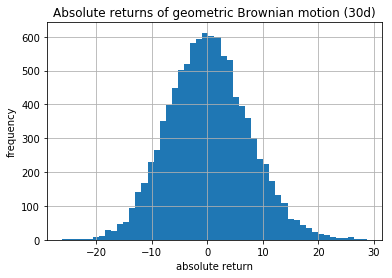

In [64]:
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.title('Absolute returns of geometric Brownian motion (30d)')
plt.grid(True)

In [65]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print ("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print (33 * "-")
for pair in zip(percs, var):
    print ("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           26.072
           99.90           20.175
           99.00           15.753
           97.50           13.265
           95.00           11.298
           90.00            8.942


In [66]:
#simulate dynamically applying jump diffusion setup from Merton
dt = 30. / 365 / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

In [67]:
R_jd = np.sort(S[-1] - S0)

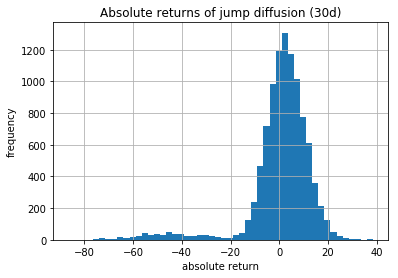

In [68]:
plt.hist(R_jd, bins=50)
plt.title('Absolute returns of jump diffusion (30d)')
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [69]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print ("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print (33 * "-")
for pair in zip(percs, var):
    print ("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           75.029
           99.90           71.833
           99.00           55.901
           97.50           45.697
           95.00           25.993
           90.00            8.773


In [70]:
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

(-90.27761910662305, 0.0)

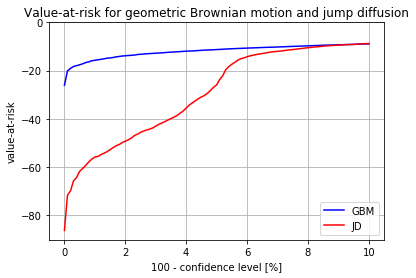

In [71]:
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.title('Value-at-risk for geometric Brownian motion and jump diffusion')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
plt.grid(True)
plt.ylim(ymax=0.0)

## 3.2 Credit Value Adjustments
Other	important	risk	measures	are	the	credit	value-at-risk	(CVaR)	and	the	credit	value adjustment	(CVA),	which	is	derived	from	the	CVaR.	Roughly	speaking,	CVaR	is	a measure	for	the	risk	resulting	from	the	possibility	that	a	counterparty	might	not	be	able	to honor	its	obligations.

In [72]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

In [73]:
L = 0.5 #a fixed (average)loss level L
p = 0.01 # afixed probability p for default (per year) of a counterparty

In [74]:
D = npr.poisson(p * T, I)
D = np.where(D > 1, 1, D) #a default can only occur once

In [75]:
np.exp(-r * T) * 1 / I * np.sum(ST)

99.98182521684292

In [76]:
CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D * ST)
CVaR

0.5152011134161355

In [77]:
S0_CVA = np.exp(-r * T) * 1 / I * np.sum((1 - L * D) * ST)
S0_CVA

99.46662410342678

In [78]:
S0_adj = S0 - CVaR
S0_adj

99.48479888658386

In [79]:
np.count_nonzero(L * D * ST)

1031

(0.0, 175)

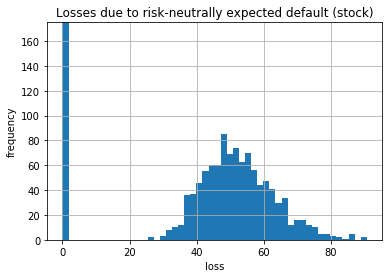

In [80]:
plt.hist(L * D * ST, bins=50)
plt.title('Losses due to risk-neutrally expected default (stock)')
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=175)

In [81]:
#Consider now the case of a European call option. Its value is 
#about 10.5 at a strike of 100
K = 100.
hT = np.maximum(ST - K, 0)
C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
C0

10.427336109660052

In [82]:
#The CVaR is about 5 cents
CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D * hT)
CVaR

0.05382257845220809

In [83]:
#  the adjusted option value is roughly 5 cents lower
C0_CVA = np.exp(-r * T) * 1 / I * np.sum((1 - L * D) * hT)
C0_CVA

10.373513531207843

In [84]:
np.count_nonzero(L * D * hT) # number of losses

582

In [85]:
np.count_nonzero(D) # number of defaults

1031

In [86]:
I - np.count_nonzero(hT) # zero payoff

43995

(0.0, 350)

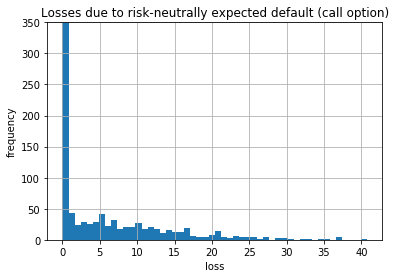

In [87]:
plt.hist(L * D * hT, bins=50)
plt.title('Losses due to risk-neutrally expected default (call option)')
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=350)